# Predictive Maintenance Example Use Case

We have two main components:

* *A machine* (M1) that we want to monitor
* *A machine learning model* (MLM) to tell us whether the machine is doing ok, or not

Assume that M1 has an attached sensor that reports values in 1/10th second intervals. We use a Gamma distribution to simulate these values (the Gamma distribution is often used for failure analysis).

# Tasks

1. Plot a distribution for each configuration indicated below (working ok, fail more often, constantly failing)
2. Observe the difference between these distributions (what do you see?)
3. Describe how we could identify outliers using a machine learning algorithm or a statistical procedure
4. Implement a simple machine learning algorithm that detects anomalies in the sensor values

References:

* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
* https://scikit-learn.org/stable/modules/outlier_detection.html


<AxesSubplot:>

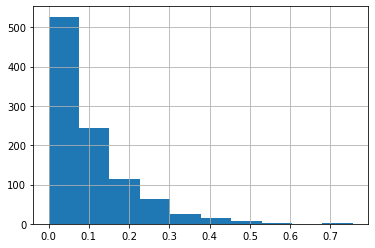

In [1]:
# generates example "sensor" values with outliers
# we use a gamma distribution to generate mostly "good" data, and a few "bad" outliers to signal failure
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

rnd = np.random.default_rng()

# Different machine configurations

# Configuration 1: working ok, intermittent failure
shape, scale = 1., .1  
# Configuration 2: fail more often
# shape, scale = 5., .1  
# Configuration 3: constantly failing
#shape, scale = 10., .1  

size = 1000
data = rnd.gamma(shape, scale, size)
# plot distribution
df = pd.Series(data)
df.hist(bins=10)

# Plot distributions for Configurations 2, 3

In [2]:
# insert your code here

<AxesSubplot:>

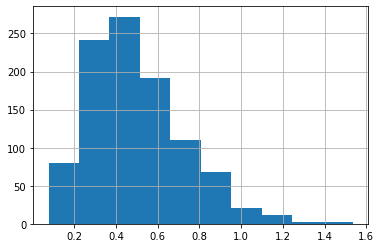

In [3]:
# Configuration 2: fail more often
shape, scale = 5., .1 

data = rnd.gamma(shape, scale, size)
# plot distribution
df = pd.Series(data)
df.hist(bins=10)

<AxesSubplot:>

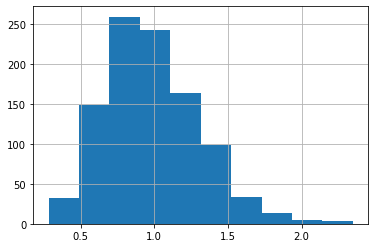

In [4]:
# Configuration 3: constantly failing
shape, scale = 10., .1

data = rnd.gamma(shape, scale, size)
# plot distribution
df = pd.Series(data)
df.hist(bins=10)

# How can we detect anomalies? 

* Using statistical methods?
* Why use a machine learning model?

# Train a machine learning model

 1    0.99
-1    0.01
dtype: float64

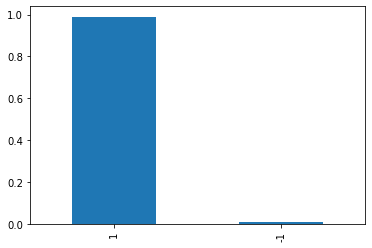

In [5]:
# use an isolation forest
from sklearn.ensemble import IsolationForest

# Configuration 1: working ok, intermittent failure
shape, scale = 1., .1  
df_train = pd.Series(rnd.gamma(shape, scale, size))

clf = IsolationForest(contamination=.01)

y_test = clf.fit_predict(df_train.values.reshape(-1, 1))
counts = pd.Series(y_test).value_counts(normalize=True)
counts.plot(kind='bar')
counts

 1    0.983
-1    0.017
dtype: float64

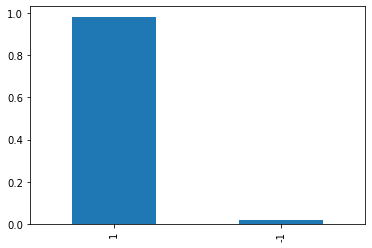

In [6]:
# test the model performance
test_data = rnd.gamma(shape, scale, size)

predictions = clf.predict(test_data.reshape((-1, 1)))
counts = pd.Series(predictions).value_counts(normalize=True)
counts.plot(kind='bar')
counts

In [7]:
# Let's save the model and the training data for later use
from util import save_model

pd.DataFrame({'value': df_train}).to_csv('datasets/traindata.csv', index=False)
save_model(clf, 'models/mymodel')